### Authors of the project: Spam Detection

In [1]:
NAME = "Jakub Sykulski"
STUDENT_NUMBER = "s1071754"
#---------------------------
COLLABORATOR_NAME = "Bezayite Amenu"
COLLABORATOR_STUDENT_NUMBER = "s1076971"

# Spam Detection Project
In the era of internet we are able to easily search for information, communicate with one another or even shop on any place on the earth with just a few strokes on the keyboard of our computer. Unfortunately, the same thing that makes our life easier, also introduces new ways on information gathering on people. The most common way to do that these days is by using 'spam' messages, email, social media accounts, ect. When 'spam' is shown to us, sometimes it looks really convincing as if it was a real product, message or email. Therefore, we click on it to find out more without realising how much we reveal about ourselves.

'Spam' is a huge problem in the current days of the internet. That's why we decided to try to create a program that would be able to scan through many messages, emails, etc. and detect which ones most likely fit the 'spam' profile.


#### Spam Data used for training and testing all of our models
At this cell we load all the necessary files and adjust them to our needs.

In [24]:
import numpy as np
from toolbox.load_assets import load_spam
from toolbox.prepare_data import prepare
from toolbox.conversion import conversion
from toolbox.reshape import reshape
#-------------------------------------------------- file loading
file = "./data/spam.csv" # 'spam' used to create a dictionary
initial_train_data = "./data/train.csv" # 'spam' used for training and testing the initial model
#--------------------------------------------------::::

#--------------------------------------------------creation of 'spam' words look up dictionary
spam_dic = load_spam(file)

#--------------------------------------------------loading and extracting data for the initial training of the model
data = prepare(initial_train_data,'spam_text','label')
text =  data[0]
labels = data[1]

#--------------------------------------------------conversion of data array to np.array
labels_np = np.asarray(labels)

#--------------------------------------------------creation of the training data, format [[0,1,0,1...],....]
train_data_main = conversion(spam_dic, text)
reshape(train_data_main)
#--------------------------------------------------conversion of data array to np.array
train_data_main_np = np.asarray(train_data_main)

#--------------------------------------------------the number of features used to train the initial model
NR_FEATURES = len(train_data_main[0])

## MLP spam detection
Our first model is an 'MLP' classifier. In order to find out what are the best values for our 'object' we decided to run some tests.

In [3]:
from tqdm.notebook import tnrange, tqdm_notebook
import numpy as np
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.model_selection import KFold

# data set division into training and testing data done with the usage of KFolds.
training = KFold(n_splits=10)
result = []
counter = 1

#-------------------------------------------------------------------------
# The determining the optimal number of hidden is done in the following way
#-------------------------------------------------------------------------
# 1. we iterate through the splits created with the usage of KFolds
#
# 2. for every split we check 25 different values for the 'hidden_layers_sizes' we start at layer 10 and go until 35
#
# 3. for every layer we train the model 5 times on the same data set and ech time we calculate the classification error
# in the end we append the mean classification error along with the layer to "avg" array.
#
# 4. at the end of the for loop the "avg" array, which contains tuples of (nr_layer, np.mean(classification_error)) for every tested layer
# for a given split, is appended to the "result" array.
#-------------------------------------------------------------------------
# The "result" array is a 2d array in format of [[(1, np.mean(classification_error)), (2, np.mean(classification_error)), ...], [(1, np.mean(classification_error)), ...]]
# where index 1 of the "result" array corresponds to first split, so on so forth.

for train_index, test_index in training.split(train_data_main, labels):
    text_train, text_test = train_data_main_np[train_index], train_data_main_np[test_index]
    labels_train, labels_test = labels_np[train_index], labels_np[test_index]
    avg = []
    test_layer = 10
    print("Processing split {}".format(counter))
    for y in tnrange(26, desc="Checking 'hidden_layers_sizes' parameter"):
        new_learn = mlp(solver='adam',hidden_layer_sizes=test_layer, max_iter=3000)
        temp = []
        for c in range(5):
            new_learn.fit(text_train, labels_train)
            temp.append(1 - new_learn.score(text_test, labels_test))
        avg.append((test_layer, np.mean(temp)))
        test_layer += 1
    counter += 1
    result.append(avg)

print(result)

Processing split 1


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 2


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 3


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 4


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 5


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 6


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 7


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 8


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 9


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

Processing split 10


Checking 'hidden_layers_parameter':   0%|          | 0/26 [00:00<?, ?it/s]

[[(10, 0.08817204301075268), (11, 0.0885304659498208), (12, 0.08781362007168458), (13, 0.08817204301075268), (14, 0.08781362007168458), (15, 0.0885304659498208), (16, 0.0885304659498208), (17, 0.08781362007168458), (18, 0.089247311827957), (19, 0.0885304659498208), (20, 0.08781362007168458), (21, 0.08888888888888888), (22, 0.08781362007168458), (23, 0.08781362007168458), (24, 0.0885304659498208), (25, 0.08781362007168458), (26, 0.08781362007168458), (27, 0.08888888888888888), (28, 0.08781362007168458), (29, 0.08781362007168458), (30, 0.08781362007168458), (31, 0.0885304659498208), (32, 0.08745519713261649), (33, 0.08888888888888888), (34, 0.08781362007168458), (35, 0.08781362007168458)], [(10, 0.09498207885304655), (11, 0.09498207885304655), (12, 0.09856630824372756), (13, 0.09498207885304655), (14, 0.09784946236559136), (15, 0.09534050179211466), (16, 0.09784946236559136), (17, 0.09569892473118277), (18, 0.09677419354838705), (19, 0.09498207885304655), (20, 0.09784946236559136), (21, 

> **Nextly we have to find out what is the optimal value for 'hidden_layer_sizes' parameter.**

The best number for 'hidden_layers_sizes' parameter is: 10 (int_answer)
-------------------------------------------------------------------
The accuracy of the model with 'hidden_layer_sizes'=10 is 0.9226767133118048
-------------------------------------------------------------------
The loss curve for 'good_model' model


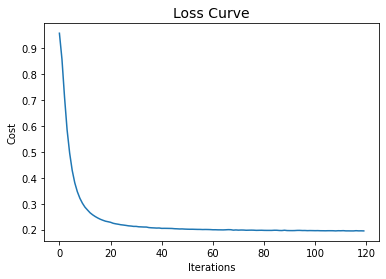

In [4]:
from statistics import mode
from sklearn.metrics import classification_report
from  matplotlib import pyplot as plt

final_results = []
answer = []

# here we return all 'layers' with the smallest classification errors
for b in result:
    temp = []
    for n in range(len(b)):
        temp.append(b[n][1])
    index_val = temp.index(np.min(temp))
    final_results.append(b[index_val])

# here we take the 'layer' parameter from the pair = i {format: (i,np.min(temp))}
for z in final_results:
    answer.append(z[0])

# here we calculate the most frequent 'layer', that has the lowest classification error => int_answer
int_answer = mode(answer)
print("The best number for 'hidden_layers_sizes' parameter is: {} (int_answer)".format(int_answer))

good_model = mlp(solver='adam',hidden_layer_sizes=int_answer, max_iter=3000)
good_model.fit(train_data_main_np,labels_np)

print("-------------------------------------------------------------------", end="\n")
print("The accuracy of the model with 'hidden_layer_sizes'={} is {}".format(int_answer,good_model.score(train_data_main_np,labels)), end="\n")
print("-------------------------------------------------------------------", end="\n")

# the loss curve for "good_model" model
print("The loss curve for 'good_model' model")
plt.plot(good_model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# The loss curve gives us a snapshot of the training process and the direction in which the network learns.
# In the case of our model, we have a good balance of cost to the number of iterations.
# Our model, has a high learning rate.


## Checking the model
In order to check the model, we will test it on a completely new data set, meaning the model was not trained on it. Here we are using "spam_database.csv". The file is loaded and adjusted with the help of the following functions:
"load_external_test_data()", "conversion()" and "reshape_for_model()".

In [5]:
from toolbox.reshape_for_model import reshape_for_model
from sklearn.model_selection import train_test_split
from toolbox.external_test_data import load_external_test_data

#--------------------------------------------------data loading
test_mlp = load_external_test_data()
converted_mlp = test_mlp[0]
labels_mlp = test_mlp[1]
#--------------------------------------------------
# the result should be really close 100% mark, might not be exactly a 100% because 'spam_dic' might not contain all the words in the 'spam_database.csv' file
test_spam_mlp = conversion(spam_dic, converted_mlp)
reshape_for_model(test_spam_mlp, NR_FEATURES)
#--------------------------------------------------scoring of the model accuracy [new data set]

final_answer_MLP = good_model.score(np.asarray(test_spam_mlp), np.asarray(labels_mlp))

print("The accuracy of the MLP model on completely new data set = {}".format(final_answer_MLP))

# 'good_model' model is defined in the one cell above

# classification report for the "good_model"
print("The classification report for the 'good_model' model, trained with parameters established in the tests above: ", end="\n")
print("\n")
pred_mlp = good_model.predict(test_spam_mlp)
print(classification_report(labels_mlp,pred_mlp))
print("\n")


The accuracy of the MLP model on completely new data set = 0.9215686274509803
The classification report for the 'good_model' model, trained with parameters established in the tests above: 


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4812
           1       0.69      0.76      0.72       747

    accuracy                           0.92      5559
   macro avg       0.83      0.85      0.84      5559
weighted avg       0.93      0.92      0.92      5559





## SVC spam detection
Our second model is an SVC classifier. In order to find the best values we will run some tests

In [6]:
from sklearn.svm import SVC

# array of all possible 'kernel' types
kernels = ['linear','poly','rbf','sigmoid']
kernel_answer = []
# for every possible kernel we calculate the accuracy
for x in kernels:
    clf = SVC(gamma='auto', kernel=x)
    clf.fit(train_data_main_np, labels_np)
    kernel_answer.append(clf.score(train_data_main_np, labels_np))
for y in range(len(kernels)):
    print("The score of kernel='{}' is {}".format(kernels[y], kernel_answer[y]), end="\n")

print("-----------------------------------------------------------")
# the answer is the 'kernel' with the best accuracy
index = kernel_answer.index(max(kernel_answer))
answer = kernels[index]
print("The best 'kernel' parameter: {}".format(answer))


The score of kernel='linear' is 0.9226767133118048
The score of kernel='poly' is 0.9076067456045928
The score of kernel='rbf' is 0.9221385001794044
The score of kernel='sigmoid' is 0.9210620739146035
-----------------------------------------------------------
The best 'kernel' parameter: linear


## Checking the model
In order to check the model, we will test it on a completely new data set, meaning the model was not trained on it. Here we are using "spam_database.csv". The file is loaded and adjusted with the help of the following functions:
"load_external_test_data()", "conversion()" and "reshape_for_model()".

In [23]:
from sklearn.svm import SVC
from toolbox.reshape_for_model import reshape_for_model
from toolbox.external_test_data import load_external_test_data
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#--------------------------------------------------data loading
test_svc = load_external_test_data()
converted_svc = test_svc[0]
labels_svc = test_svc[1]
#--------------------------------------------------creating a model
svc = SVC(gamma='auto', kernel=answer)
svc.fit(train_data_main_np, labels_np)
#--------------------------------------------------data preparation

# the result should be really close 100% mark, might not be exactly a 100% because 'spam_dic' might not contain all the words in the 'spam_database.csv' file
test_spam_svc = conversion(spam_dic, converted_svc)
reshape_for_model(test_spam_svc, NR_FEATURES)
#--------------------------------------------------scoring of the model accuracy [new data set]

final_answer_SVC = svc.score(np.asarray(test_spam_svc), np.asarray(labels_svc))

print("The accuracy of the SVC model on completely new data set = {}".format(final_answer_SVC))
print("-----------------------------------------------------------", end="\n")

# classification report creation for the "good_model"
print("The classification report for the 'svc' model, trained with parameters established in the tests above: ", end="\n")
print("\n")
pred_svc = svc.predict(test_spam_svc)
print(classification_report(labels_svc,pred_svc))

5559
The accuracy of the SVC model on completely new data set = 0.9215686274509803
-----------------------------------------------------------
The classification report for the 'svc' model, trained with parameters established in the tests above: 


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4812
           1       0.69      0.76      0.72       747

    accuracy                           0.92      5559
   macro avg       0.83      0.85      0.84      5559
weighted avg       0.93      0.92      0.92      5559



## DecisionTree spam detection
Our third and last model is a DecisionTreeClassifier. In order to tune our parameters for this model we run some tests.

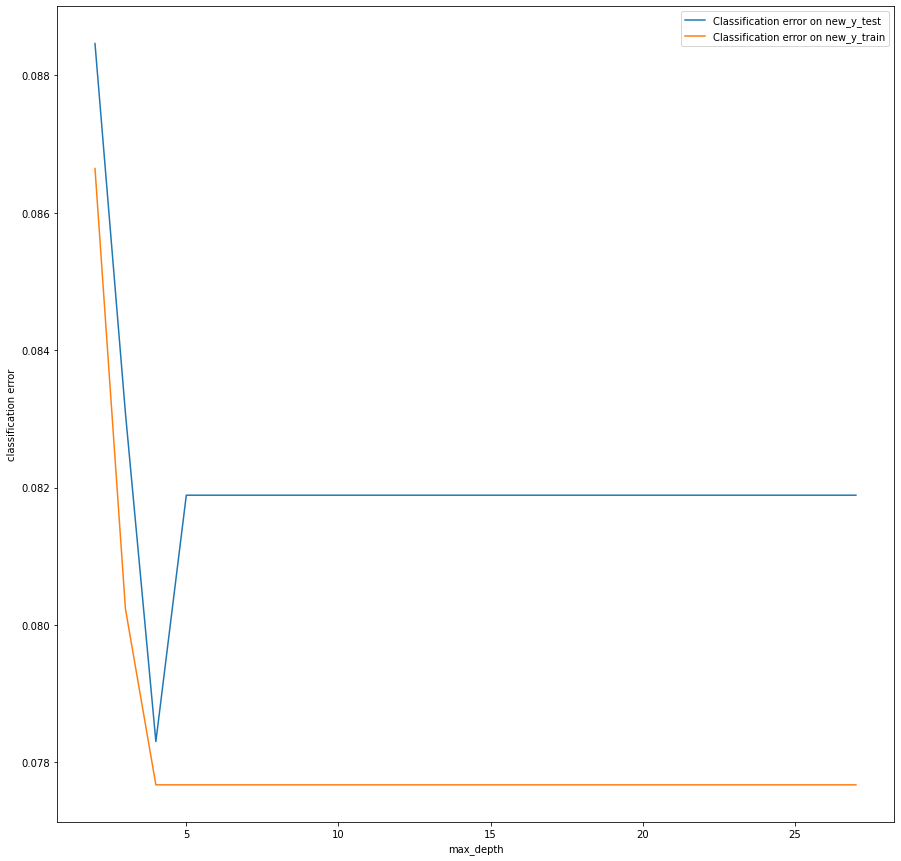

The best depth for the new_y_test prediction: 4,
The best depth for the new_y_train prediction: 4,
The optimal depth: 4


In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

random_state = 1000
max_depth = []
accuracy_scores_y_test = []
accuracy_scores_y_train = []

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(train_data_main_np, labels_np, stratify=labels_np, test_size=0.3,
                                                                    random_state=random_state)

for i in range(2, 28):
    #----------------------------------------------tree classifier creation
    dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=100, max_depth=i)
    dtc = dtc.fit(new_X_train, new_y_train)
    #----------------------------------------------making predictions on data
    y_test_pred = dtc.predict([[row][0] for row in new_X_test])
    y_train_pred = dtc.predict([[row][0] for row in new_X_train])
    #----------------------------------------------classification error calculation
    classificaton_err_y_test = 1 - accuracy_score(new_y_test, y_test_pred)
    classificaton_err_y_train = 1 - accuracy_score(new_y_train, y_train_pred)
    #----------------------------------------------gathering data
    accuracy_scores_y_test.append(classificaton_err_y_test)
    accuracy_scores_y_train.append(classificaton_err_y_train)
    max_depth.append(i)
#----------------------------------------------data classification
d = pd.DataFrame({'acc_y_test': pd.Series(accuracy_scores_y_test),
                  'acc_y_train': pd.Series(accuracy_scores_y_train),
                  'max_depth': pd.Series(max_depth)})
#----------------------------------------------graph creation
plt.figure(figsize=(15,15))
plt.plot('max_depth', 'acc_y_test', data=d, label="Classification error on new_y_test")
plt.plot('max_depth', 'acc_y_train', data=d, label="Classification error on new_y_train")
plt.xlabel("max_depth")
plt.ylabel("classification error")
plt.legend()
plt.show()
#----------------------------------------------other operations
min_y_test = min(accuracy_scores_y_test)
min_y_train = min(accuracy_scores_y_train)

best_point_y_test = accuracy_scores_y_test.index(min_y_test)
best_point_y_train = accuracy_scores_y_train.index(min_y_train)

#----------------------------------------------the most optimal depth for the DecisionTree
answer_dtc = max(max_depth[best_point_y_test], max_depth[best_point_y_train])
#----------------------------------------------
print("The best depth for the new_y_test prediction: {},\nThe best depth for the new_y_train prediction: {},".format(
    max_depth[best_point_y_test], max_depth[best_point_y_train]), end="\n")
print("The optimal depth: {}".format(answer_dtc))

> **After finding the optimal depth for our tree, let's plot.**

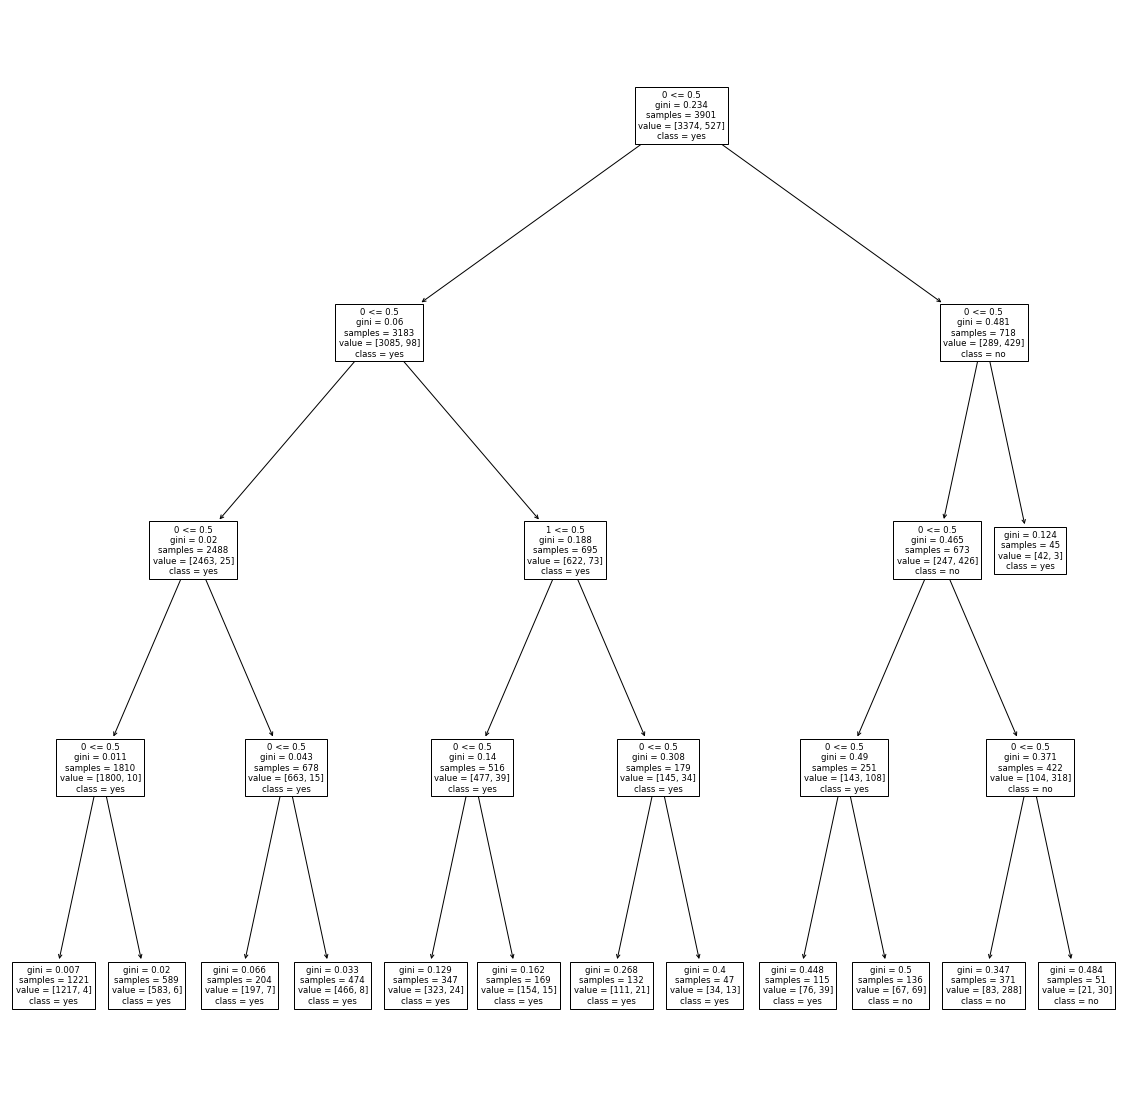

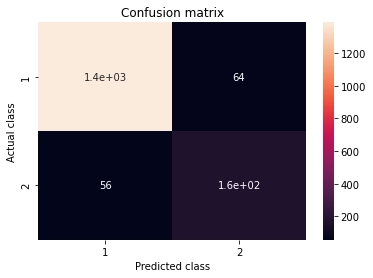

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from toolbox.confusion_matrix import plot_confusion_matrix

# 'answer_dtc' variable is the declared in the cell above, it has a value of the best 'max_depth' that we found
X_train, X_test, y_train, y_test = train_test_split(train_data_main_np, labels_np, test_size=0.3, random_state=100)
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=100, max_depth=answer_dtc)
dtc = dtc.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
tree.plot_tree(dtc, feature_names=labels_np,class_names=['yes','no'])
plt.show()
#-------------------------------
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, y_test)

## Checking the model
In order to check the model, we will test it on a completely new data set, meaning the model was not trained on it. Here we are using "spam_database.csv". The file is loaded and adjusted with the help of the following functions:
"load_external_test_data()", "conversion()" and "reshape_for_model()".

In [10]:
from toolbox.reshape_for_model import reshape_for_model
from toolbox.external_test_data import load_external_test_data

#--------------------------------------------------data loading
test_tree = load_external_test_data()
converted_tree = test_tree[0]
labels_tree = test_tree[1]
#--------------------------------------------------creating a model
dtc_tree = DecisionTreeClassifier(criterion='gini',min_samples_split=100, max_depth=answer_dtc)
dtc_tree.fit(train_data_main_np, labels_np)
#--------------------------------------------------data preparation

# the result should be really close 100% mark, might not be exactly a 100% because 'spam_dic' might not contain all the words in the 'spam_database.csv' file
test_spam_tree = conversion(spam_dic, converted_tree)
reshape_for_model(test_spam_tree, NR_FEATURES)
#--------------------------------------------------scoring of the model accuracy [new data set]
final_answer_DTC = dtc_tree.score(np.asarray(test_spam_tree), np.asarray(labels_tree))

print("The accuracy of the DecisionTree model on completely new data set = {}".format(final_answer_DTC))

# classification report creation for the "dtc_tree"
print("The classification report for the 'svc' model, trained with parameters established in the tests above: ", end="\n")
print("\n")
pred_dtc = dtc_tree.predict(test_spam_tree)
print(classification_report(labels_tree,pred_dtc))

The accuracy of the DecisionTree model on completely new data set = 0.9215686274509803
The classification report for the 'svc' model, trained with parameters established in the tests above: 


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4812
           1       0.69      0.76      0.72       747

    accuracy                           0.92      5559
   macro avg       0.83      0.85      0.84      5559
weighted avg       0.93      0.92      0.92      5559



# Final results
This last section of our 'spamDetectionProject' is dedicated to finding the best model. The decision will be made by comparing accuracy scores from each model that were obtained by scoring each of the models on the external data set.

In [19]:
models = [final_answer_MLP, final_answer_DTC, final_answer_SVC]
models_names = ["MLP", "DecisionTree", "SVC"]

best = max(models)
index_best = models.index(best)

print("The best model for spam classification, based on the accuracy score is #{}#. It correctly classified {}% of elements".format(models_names[index_best], round(best*100,2)))

The best model for spam classification, based on the accuracy score is #MLP#. It correctly classified 92.16% of elements
